In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
data=pd.read_csv('/content/Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


**EDA**

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


Give us idea about the no of data points and there return type

In [87]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


based on the data we can infer that feature scaling is not required 

**Transformations**

In [88]:
#creating new copy
data1=data.copy()

Converting all categorical to numerical

In [89]:
data1['US']=np.where(data['US']=="No",0,1)
data1['Urban']=np.where(data['Urban']=="Yes",1,0)

In [90]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


Now using label encoding we will convert the Shelveloc to numerical value with values, bad=1,medium =2 ,and good=3

Let create function to convert the values 

In [91]:
def convert(X):
  if X=='Bad':
    y=1
  elif X=='Medium':
    y=2
  else:
    y=3
  return y

In [92]:
data1['ShelveLoc']=data['ShelveLoc'].map(convert)

In [93]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,1,42,17,1,1
1,11.22,111,48,16,260,83,3,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,1,38,13,1,0


Now we have to convert the target variable to categorical 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


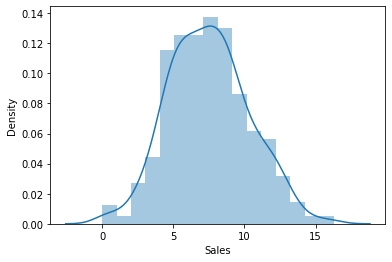

In [94]:
sns.distplot(data1['Sales'])

We can create 3 categories from this distribution.
sales less than 5 as 'low',between 5-10 as 'medium' and sales above 10 as 'high'

In [95]:
#creating function to convert the sales column
def sales_convert(X):
  if X<5:
    y=1  #indicating low
  elif X<10:
    y=2
  else:
    y=3
  return y

In [96]:
data1['Sales']=data1['Sales'].map(sales_convert)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


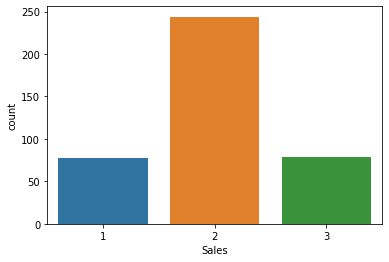

In [97]:
sns.countplot(data1['Sales'])

Now the data we have has been converted into the required format

In [98]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,1,42,17,1,1
1,3,111,48,16,260,83,3,65,10,1,1
2,3,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,1,38,13,1,0


**Visualizations**

**Distplot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

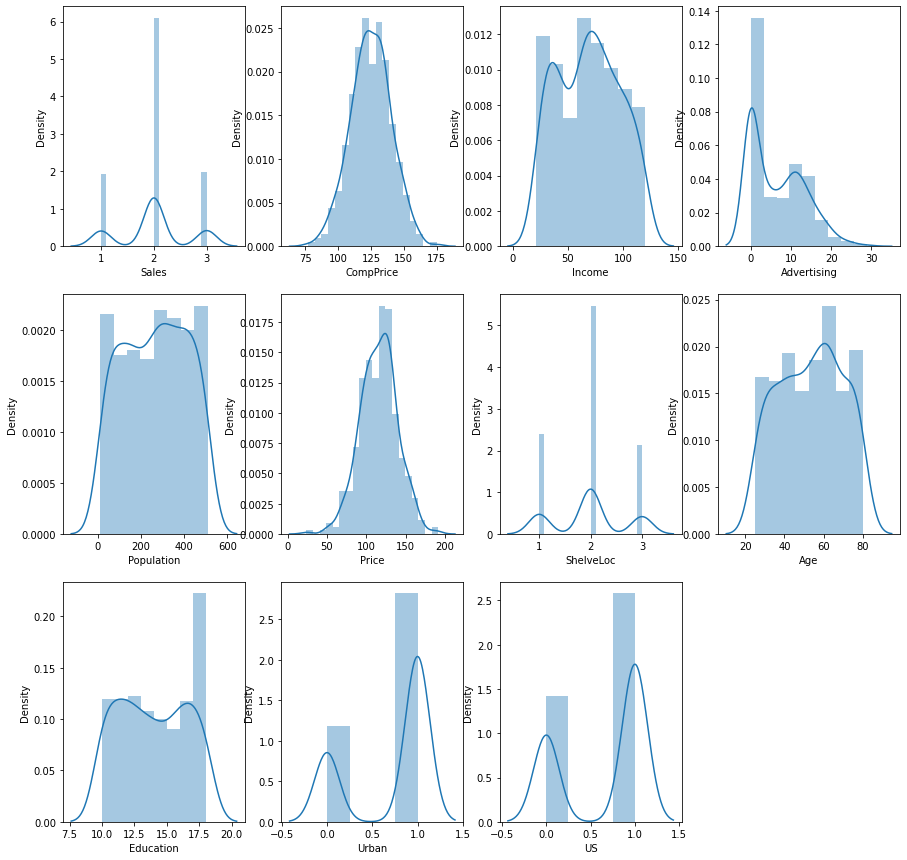

In [99]:
name=data.columns
plt.figure(figsize=(15,15))
for i in range(0,len(name)):
  plt.subplot(3,4,i+1)
  sns.distplot(data1[name[i]])

**Count plot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


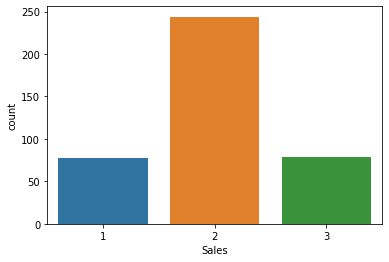

In [100]:
sns.countplot(data1['Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


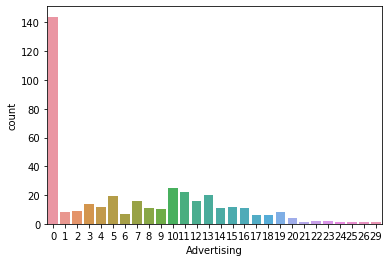

In [101]:
sns.countplot(data1['Advertising'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


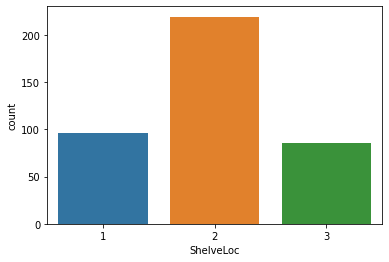

In [102]:
sns.countplot(data1['ShelveLoc'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


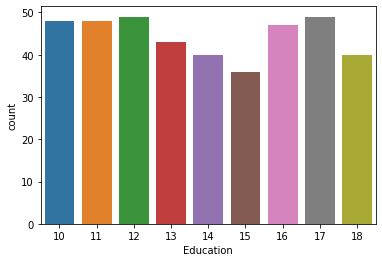

In [103]:
sns.countplot(data1['Education'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


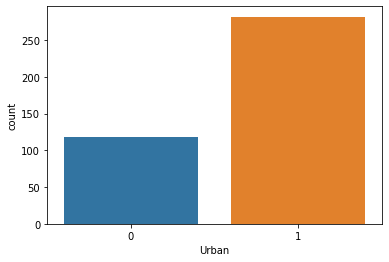

In [104]:
sns.countplot(data1['Urban'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


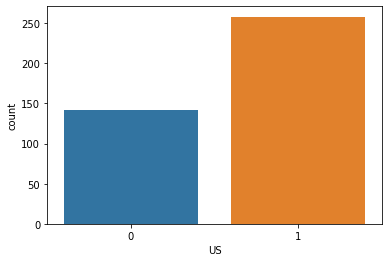

In [105]:
sns.countplot(data1['US'])

**Missing values**

In [106]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sales        400 non-null    int64
 1   CompPrice    400 non-null    int64
 2   Income       400 non-null    int64
 3   Advertising  400 non-null    int64
 4   Population   400 non-null    int64
 5   Price        400 non-null    int64
 6   ShelveLoc    400 non-null    int64
 7   Age          400 non-null    int64
 8   Education    400 non-null    int64
 9   Urban        400 non-null    int64
 10  US           400 non-null    int64
dtypes: int64(11)
memory usage: 34.5 KB


In [107]:
data1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

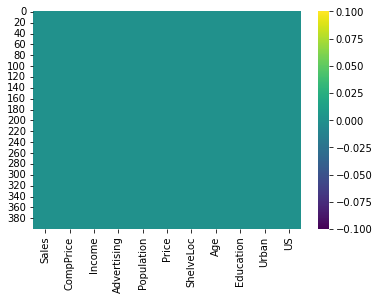

In [108]:
sns.heatmap(data1.isnull(),cmap='viridis')

From the above data we can infer that there is no missing values in the dataset

**Duplicate's**

In [109]:
data1.duplicated().sum()

0

There is no duplicate values present in the data set

**Correlations**

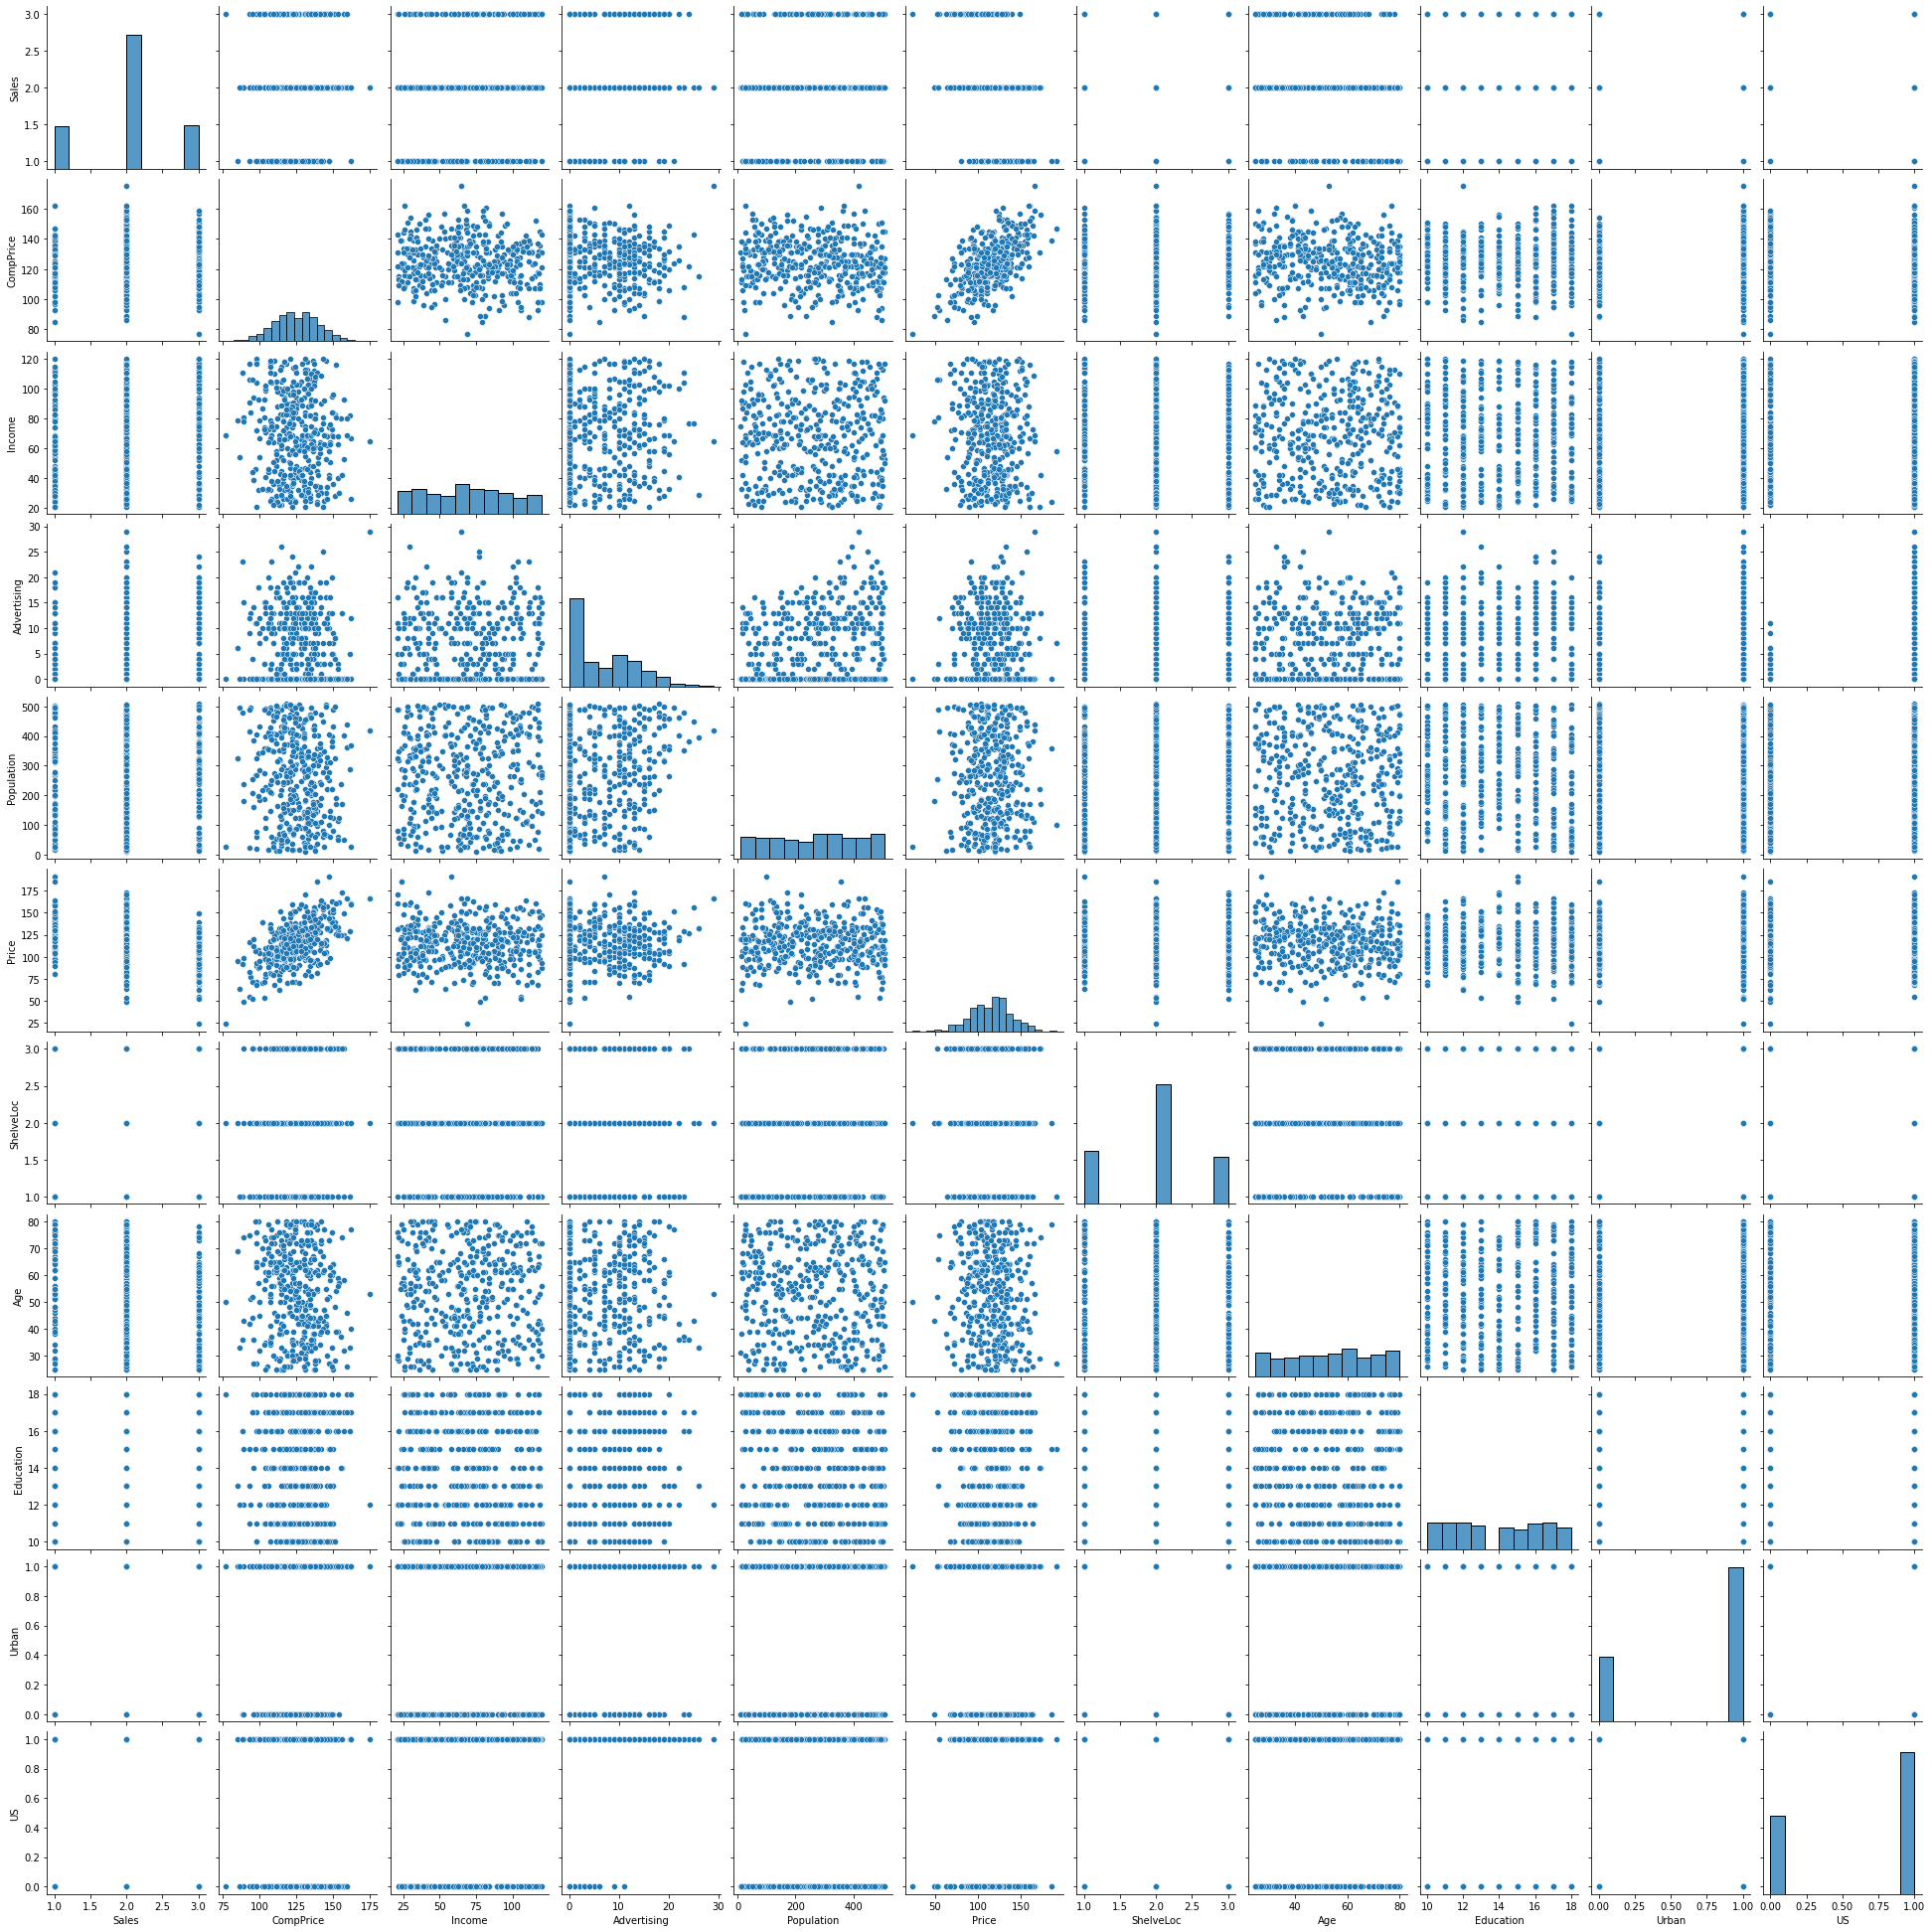

In [110]:
sns.pairplot(data1)

In [111]:
data1.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.047325,0.132869,0.242736,0.017660,-0.381353,0.488743,-0.231996,-0.011931,-0.003599,0.156531
CompPrice,0.047325,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.038549,-0.100239,0.025197,0.066594,0.016869
Income,0.132869,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.053465,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.242736,-0.024199,0.058995,1.000000,0.265652,0.044537,0.056552,-0.004557,-0.033594,0.042035,0.684460
Population,0.017660,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.020614,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.381353,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.050924,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.488743,0.038549,-0.053465,0.056552,-0.020614,0.050924,1.000000,0.014149,-0.025723,-0.075404,0.047378
Age,-0.231996,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.014149,1.000000,0.006488,0.028479,0.008652
Education,-0.011931,0.025197,-0.056855,-0.033594,-0.106378,0.011747,-0.025723,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.003599,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.075404,0.028479,-0.033094,1.000000,0.047085


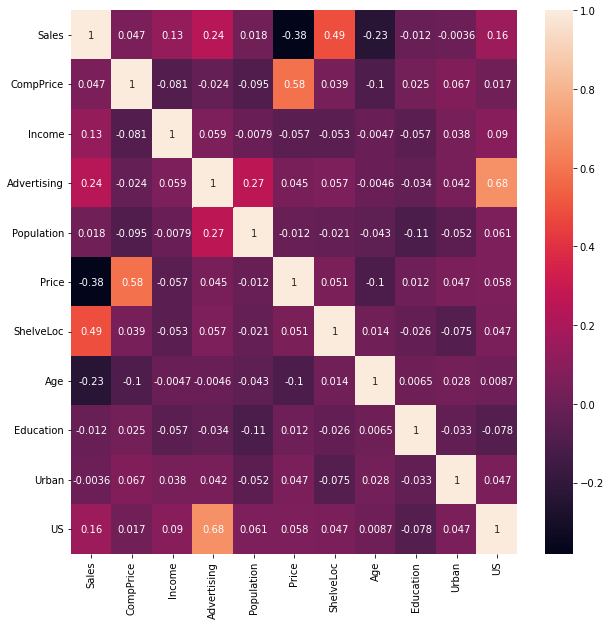

In [112]:
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(),annot=True)

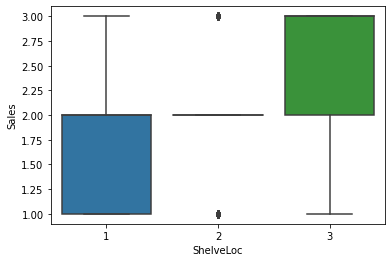

In [113]:
sns.boxplot(x=data1['ShelveLoc'],y=data1['Sales'],data=data1)

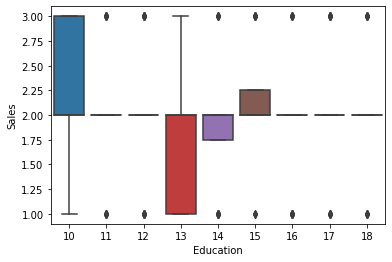

In [114]:
sns.boxplot(x=data1['Education'],y=data1['Sales'],data=data1)

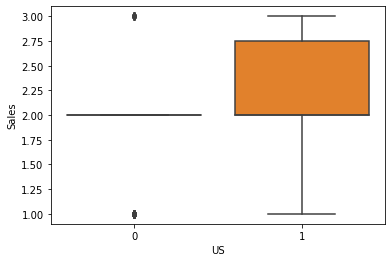

In [115]:
sns.boxplot(x=data1['US'],y=data1['Sales'],data=data1)

These plots gives us an idea about relations ship of each of the features with the target variable

Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

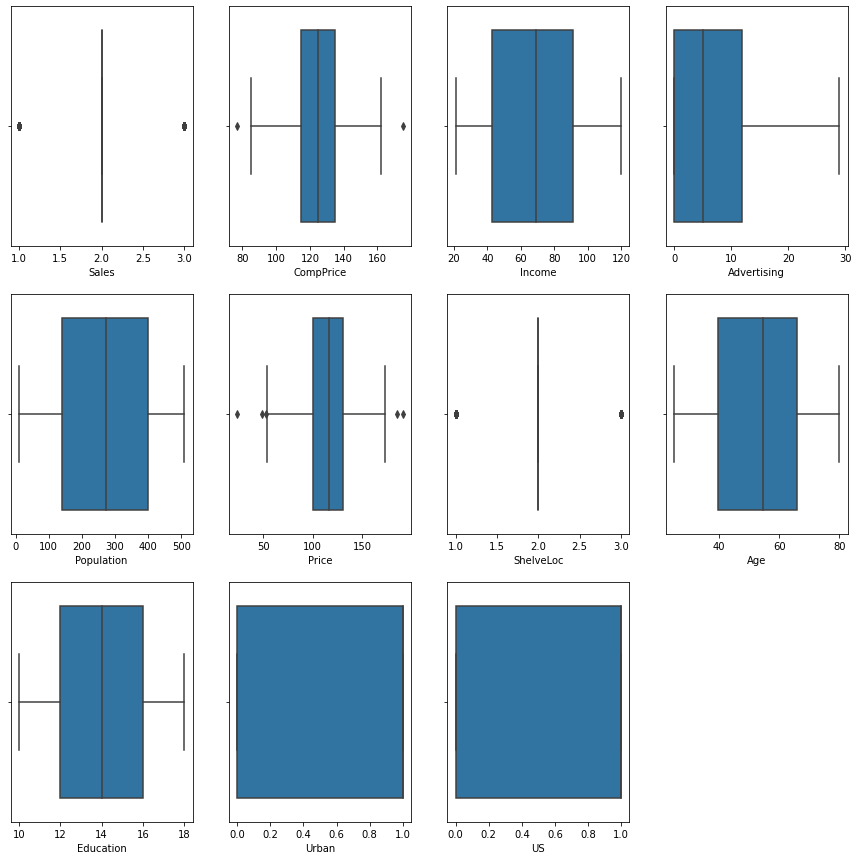

In [121]:
fig=plt.figure(figsize=(15,15))
name=data1.columns
for i in range(0,len(name)):
  plt.subplot(3,4,i+1)
  sns.boxplot(data1[name[i]])

Detecting outlier using Isolation forest

In [122]:
from sklearn.ensemble import IsolationForest

In [131]:
ob1=IsolationForest(random_state=0,contamination=.04)
ob1.fit(data1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.04, random_state=0)

In [132]:
y_outliers_pred=ob1.predict(data1)
y_outliers_pred

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [142]:
(y_outliers_pred==-1).sum()

16

In [137]:
data2=data1.copy()

In [139]:
data2['outlier']=y_outliers_pred

Based on the isolation forest with contamination =4% we found that 16 data points are outliers

In [148]:
data2.drop(data2.index[data2['outlier'] ==-1],inplace=True)

In [149]:
data2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,outlier
0,2,138,73,11,276,120,1,42,17,1,1,1
1,3,111,48,16,260,83,3,65,10,1,1,1
2,3,113,35,10,269,80,2,59,12,1,1,1
3,2,117,100,4,466,97,2,55,14,1,1,1
4,1,141,64,3,340,128,1,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,3,138,108,17,203,128,3,33,14,1,1,1
396,2,139,23,3,37,120,2,55,11,0,1,1
397,2,162,26,12,368,159,2,40,18,1,1,1
398,2,100,79,7,284,95,1,50,12,1,1,1


We have now dropped the the outliers in the dataset

In [152]:
data2.drop(['outlier'],axis=1,inplace=True)

In [153]:
data2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,1,42,17,1,1
1,3,111,48,16,260,83,3,65,10,1,1
2,3,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,1,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,3,138,108,17,203,128,3,33,14,1,1
396,2,139,23,3,37,120,2,55,11,0,1
397,2,162,26,12,368,159,2,40,18,1,1
398,2,100,79,7,284,95,1,50,12,1,1


Selecting independent and dependent variable

In [155]:
X=data2.iloc[:,1:].values
y=data2.iloc[:,0].values

In [156]:
X

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [162,  26,  12, ...,  18,   1,   1],
       [100,  79,   7, ...,  12,   1,   1],
       [134,  37,   0, ...,  16,   1,   1]])

In [157]:
y

array([2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3, 1, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2,
       3, 2, 2, 1, 2, 3, 2, 2, 2, 1, 3, 2, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1,
       1, 3, 1, 1, 2, 2, 2, 3, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 3, 2, 2,
       2, 2, 3, 2, 3, 2, 1, 2, 2, 2, 3, 1, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 3, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 3,
       3, 2, 2, 2, 1, 2, 2, 1, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 1, 2, 1, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 3, 2, 1, 1, 2, 1, 2, 3, 3, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 1, 3, 3, 1, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 2, 2,
       2, 2, 2, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 2, 1, 3,
       2, 2, 2, 2, 3, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2,

**Feature Engineering**

Based on decision tree classifier we can find the best feature

In [160]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)
print(model.feature_importances_*100)

[17.26339479 12.13349083 10.24886926  7.64672862 19.05338528 13.60131489
 14.20770102  3.18804362  1.93241577  0.72465591]


The price of the cloth is the major contribution followed by competitor price,then shelvelocation

In [159]:
data2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,1,42,17,1,1
1,3,111,48,16,260,83,3,65,10,1,1
2,3,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,1,38,13,1,0


**Model Building**

**Using train test split method**

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

**Random forest Classifier**

In [162]:
from sklearn.ensemble import RandomForestClassifier
num_trees=100
max_features=3
rfc=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=3)

In [163]:
y_pred=rfc.predict(X_test)

In [164]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [165]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.40      0.57        10
           2       0.77      0.94      0.84        49
           3       0.77      0.56      0.65        18

    accuracy                           0.78        77
   macro avg       0.85      0.63      0.69        77
weighted avg       0.80      0.78      0.76        77



In [166]:
print(accuracy_score(y_test,y_pred))

0.7792207792207793


In [167]:
print(confusion_matrix(y_test,y_pred))

[[ 4  6  0]
 [ 0 46  3]
 [ 0  8 10]]


The accuracy of the above model is 78%

Let us check for different random_state

In [180]:
for i in range(0,50):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=i)
  num_trees=100
  max_features=3
  rfc=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
  rfc.fit(X_train,y_train)
  print(accuracy_score(y_test,y_pred),'===>',i)

0.7792207792207793 ===> 0
0.5064935064935064 ===> 1
0.5064935064935064 ===> 2
0.5974025974025974 ===> 3
0.5454545454545454 ===> 4
0.4675324675324675 ===> 5
0.5714285714285714 ===> 6
0.5844155844155844 ===> 7
0.5844155844155844 ===> 8
0.4675324675324675 ===> 9
0.5324675324675324 ===> 10
0.5454545454545454 ===> 11
0.4935064935064935 ===> 12
0.5194805194805194 ===> 13
0.4675324675324675 ===> 14
0.5714285714285714 ===> 15
0.4805194805194805 ===> 16
0.5844155844155844 ===> 17
0.4805194805194805 ===> 18
0.5324675324675324 ===> 19
0.5454545454545454 ===> 20
0.5454545454545454 ===> 21
0.6233766233766234 ===> 22
0.4805194805194805 ===> 23
0.44155844155844154 ===> 24
0.5974025974025974 ===> 25
0.6103896103896104 ===> 26
0.5844155844155844 ===> 27
0.5454545454545454 ===> 28
0.5324675324675324 ===> 29
0.6103896103896104 ===> 30
0.5584415584415584 ===> 31
0.5064935064935064 ===> 32
0.6103896103896104 ===> 33
0.5454545454545454 ===> 34
0.5194805194805194 ===> 35
0.4805194805194805 ===> 36
0.44155844

There is no significate imporvement observed while changing the random state

In [186]:
search={'n_estimators':[50,100,150,200,500,100],'max_features':[2,3,4,5,6],'max_depth':[3,4,5,6,7]}
rfc4=RandomForestClassifier()
Gs=GridSearchCV(estimator=rfc4,param_grid=search,scoring='accuracy',cv=10)
Gs.fit(X_train,y_train)
#best parameters
print(Gs.best_params_)
print(Gs.best_score_)

{'max_depth': 7, 'max_features': 6, 'n_estimators': 50}
0.7332258064516128


There is no significant increase in accuracy

**Using k-fold validation method**

In [168]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [175]:
kfold=KFold(n_splits=10,random_state=0,shuffle=True)
rfc2=RandomForestClassifier(n_estimators=100,max_features=3)
results=cross_val_score(rfc2,X,y,cv=kfold)
print(results)
print(results.mean())

[0.84615385 0.76923077 0.69230769 0.66666667 0.71052632 0.84210526
 0.63157895 0.63157895 0.73684211 0.78947368]
0.7316464237516869


The mean accuracy of the model is 73% which is low compared to above method

Let us now change the no:of trees =50 and max_features =4

In [178]:
kfold=KFold(n_splits=10,random_state=0,shuffle=True)
rfc2=RandomForestClassifier(n_estimators=50,max_features=4)
results=cross_val_score(rfc2,X,y,cv=kfold)
print(results)
print(results.mean())

[0.84615385 0.82051282 0.71794872 0.66666667 0.68421053 0.86842105
 0.63157895 0.65789474 0.78947368 0.76315789]
0.7446018893387315


The accuracy of the model increased to 74%

**Grid search cv**
For best parameters

In [181]:
from sklearn.model_selection import GridSearchCV
search={'n_estimators':[50,100,150,200,500,100],'max_features':[2,3,4,5,6],'max_depth':[3,4,5,6,7]}

In [182]:
rfc3=RandomForestClassifier()
Gs=GridSearchCV(estimator=rfc3,param_grid=search,scoring='accuracy',cv=10)

In [183]:
Gs.fit(X,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 200, 500, 100]},
             scoring='accuracy')

In [184]:
#best parameters
print(Gs.best_params_)

{'max_depth': 7, 'max_features': 5, 'n_estimators': 500}


In [185]:
print(Gs.best_score_)

0.7267206477732794


The best accuracy of the model is 78% using train test split method and with random state =0 

Let us now perform feature selection

In [187]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)
print(model.feature_importances_*100)

[17.34391211  9.27512583 11.45662912  6.87606281 21.4224527  13.60131489
 16.39547173  1.77093872  1.85809209  0.        ]


We will now drop feature with less than 5% score

In [189]:
data3=data2.copy()

In [190]:
data3.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,1,42,17,1,1
1,3,111,48,16,260,83,3,65,10,1,1
2,3,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,1,38,13,1,0


Selecting independent variable and dependent variable

In [191]:
#selecting only feature with accuracy score more than 5%
X=data3.iloc[:,1:8].values
y=data3.iloc[:,1].values

In [193]:
kfold=KFold(n_splits=10,random_state=0,shuffle=True)
rfc5=RandomForestClassifier(n_estimators=50,max_features=4)
results=cross_val_score(rfc5,X,y,cv=kfold)
print(results)
print(results.mean())

[0.61538462 0.76923077 0.64102564 0.71794872 0.84210526 0.73684211
 0.76315789 0.73684211 0.63157895 0.76315789]
0.7217273954116059


Using Kfold we dont see much imporvements

In [194]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)
rfc6=RandomForestClassifier(n_estimators=100,max_features=3)
rfc6.fit(X_train,y_train)

RandomForestClassifier(max_features=3)

In [196]:
y_pred=rfc6.predict(X_test)

In [197]:
print(accuracy_score(y_pred,y_test))

0.5714285714285714


The accuracy of this model is very low.
So we prefer the first model with accuracy score of 78%